#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03C Measurig home team advantage in football**

using the football dataset

version 1.0 2021-05-05

In [14]:
pip install plotnine


Note: you may need to restart the kernel to use updated packages.


In [21]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from plotnine import ggplot, aes, geom_histogram
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/football/clean/"
data_out = dirname + "da_case_studies/ch03-football-home-advantage/"
output = dirname + "da_case_studies/ch03-football-home-advantage/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [3]:
df = pd.read_csv("/workspaces/codespaces-jupyter/data/epl_games.csv")
#df = pd.read_csv("https://osf.io/bdjt5/download")

In [4]:
df = df.loc[df["season"] == 2016, :].reset_index(drop=True)

In [5]:
df.shape

(380, 9)

In [8]:
df.head().T

,0,1,2,3,4
div,E0,E0,E0,E0,E0
season,2016,2016,2016,2016,2016
date,13aug2016,13aug2016,13aug2016,13aug2016,13aug2016
team_home,Middlesbrough,Burnley,Everton,Crystal Palace,Man City
team_away,Stoke,Swansea,Tottenham,West Brom,Sunderland
points_home,1,0,1,0,3
points_away,1,3,1,3,0
goals_home,1,0,1,0,2
goals_away,1,1,1,1,1


In [9]:
df["home_goaladv"] = df["goals_home"] - df["goals_away"]

In [18]:
df["home_goaladv"].unique()

array([ 0, -1,  1, -2,  2, -3,  3, -4,  4,  5, -5, -6])

### Table 3.7 Describing the home team – away team goal difference (and 3.9)

In [10]:
pd.DataFrame.from_dict(
    {
        "Statistics": [
            "Mean",
            "Standard deviation",
            "Percent positive",
            "Percent zero",
            "Percent negative",
            "Number of observations",
        ],
        "Value": [
            df["home_goaladv"].describe()["mean"],
            df["home_goaladv"].describe()["std"],
            (df["home_goaladv"] > 0).sum() / df["home_goaladv"].shape[0] * 100,
            (df["home_goaladv"] == 0).sum() / df["home_goaladv"].shape[0] * 100,
            (df["home_goaladv"] < 0).sum() / df["home_goaladv"].shape[0] * 100,
            df["home_goaladv"].describe()["count"],
        ],
    }
).round(1)

,Statistics,Value
0,Mean,0.4
1,Standard deviation,1.9
2,Percent positive,49.2
3,Percent zero,22.1
4,Percent negative,28.7
5,Number of observations,380.0


In [19]:
df["home_goaladv"].value_counts()

home_goaladv
 0    84
 1    79
 2    65
-1    50
-2    31
 3    25
-3    17
 4    13
-4     8
 5     5
-5     2
-6     1
Name: count, dtype: int64

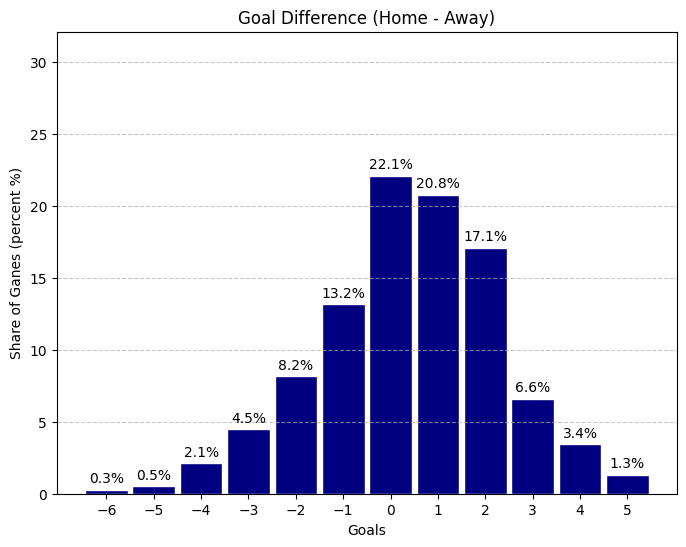

In [31]:
perc = df["home_goaladv"].value_counts(normalize=True).sort_index() * 100
goal_diff = sorted(df["home_goaladv"].dropna().unique())

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(goal_diff, perc.values, color="navy", edgecolor="white", width=0.9)


# Add labels above bars
ax.bar_label(bars, labels=[f"{val:.1f}%" for val in perc.values], padding=3)

# Formatting
ax.set_xlabel("Goals")
ax.set_ylabel("Share of Ganes (percent %)")
ax.set_title("Goal Difference (Home - Away)")
ax.set_xticks(goal_diff)
ax.set_ylim(0, perc.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



### Figure 3.9 The distribution of home team – away team goal difference

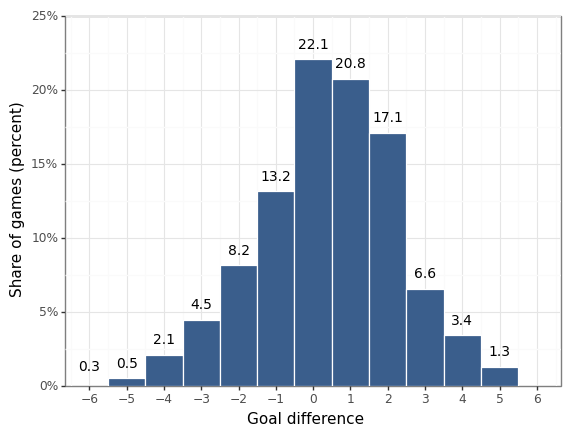

<ggplot: (675726969)>

In [ ]:
(
    ggplot(df, aes(x="home_goaladv", y="stat(count)/sum(stat(count))"))
    + geom_histogram(fill=color[0], color="white", binwidth=1)
    + geom_text(
        aes(label="[round(x,1) for x in stat(count)/sum(stat(count))*100]"),
        stat="count",
        size=10,
        nudge_y=0.01,
    )
    + labs(x="Goal difference", y="Share of games (percent)")
    + scale_x_continuous(expand=(0.05, 0.05), limits=(-6, 6), breaks=seq(-6, 6, by=1))
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 0.25),
        breaks=seq(0, 0.25, by=0.05),
        labels=percent_format(),
    )
    + theme_bw()


look at goal advantage by team

table *not* used in book, but interesting

In [11]:
df.loc[
    df["team_home"].isin(["Chelsea", "Arsenal", "Leicester", "Stoke", "West Ham"])
].groupby("team_home").agg(
    Count=("home_goaladv", "size"),
    Mean=("home_goaladv", np.mean),
    Median=("home_goaladv", np.median),
    Std=("home_goaladv", np.std),
    Min=("home_goaladv", min),
)

,Count,Mean,Median,Std,Min
team_home,,,,,
Arsenal,19,1.210526,1.0,1.182227,-1
Chelsea,19,2.000000,2.0,1.563472,-1
Leicester,19,0.315789,1.0,2.237375,-5
Stoke,19,0.000000,0.0,1.855921,-4
West Ham,19,-0.631579,0.0,2.033348,-4


In [12]:
df.loc[
    df["team_home"].isin(["Chelsea", "Arsenal", "Leicester", "Stoke", "West Ham"]),
    "home_goaladv",
].describe()

count    95.000000
mean      0.578947
std       2.003077
min      -5.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: home_goaladv, dtype: float64